**Dataset Summary for Kaggle**
Association Rule Mining & Market Basket Analysis
Market Basket Analysis is a key technique used by retailers to identify relationships between items frequently bought together. It helps uncover associations in transaction data using Association Rule Mining.

**Dataset Details:**

**Total Rows:** 38,765 (purchase orders from grocery stores)

Can be analyzed using the Apriori Algorithm to generate association rules

**Apriori Algorithm Overview:**

Identifies frequent itemsets in transactions

Expands them into larger sets if they meet the required frequency threshold

Helps discover association rules to highlight general purchasing trends

**Example of Association Rules:**
If 100 customers purchase:

10 buy milk

8 buy butter

6 buy both

Then, the rule "Milk → Butter" has:

**Support:** 6% (transactions with both items)

**Confidence: **75% (probability of buying butter if milk is bought)

**Lift:** 7.5 (how much more likely butter is bought with milk compared to random chance)

**Key Metrics:**

**Support**: Popularity of an item (frequency in transactions)

**Confidence:** Probability of buying item Y when X is bought

**Lift**: Strength of the association while accounting for item Y’s overall popularity

This dataset can be used for retail analytics, personalized recommendations, and sales optimization. 🚀

 # Important Libaries

In [116]:
# !pip install networkx==2.3
# !pip install mlxtend==0.14.0


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style
%matplotlib inline
from mlxtend.frequent_patterns import apriori,association_rules
from collections import Counter
from IPython.display import Image


from warnings import filterwarnings
filterwarnings("ignore")

In [117]:
pip install apyori


Note: you may need to restart the kernel to use updated packages.


In [118]:

from apyori import apriori

# Load Data

In [119]:
df = pd.read_csv("/kaggle/input/groceries-dataset/Groceries_dataset.csv")

print(df)

       Member_number        Date        itemDescription
0               1808  21-07-2015         tropical fruit
1               2552  05-01-2015             whole milk
2               2300  19-09-2015              pip fruit
3               1187  12-12-2015       other vegetables
4               3037  01-02-2015             whole milk
...              ...         ...                    ...
38760           4471  08-10-2014          sliced cheese
38761           2022  23-02-2014                  candy
38762           1097  16-04-2014               cake bar
38763           1510  03-12-2014  fruit/vegetable juice
38764           1521  26-12-2014               cat food

[38765 rows x 3 columns]


# Overview of dataset

In [120]:
df.size

116295

In [52]:
df.shape

(38765, 3)

In [121]:
df.columns

Index(['Member_number', 'Date', 'itemDescription'], dtype='object')

In [122]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [123]:
df.dtypes

Member_number       int64
Date               object
itemDescription    object
dtype: object

In [124]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [125]:
df.tail()

,Member_number,Date,itemDescription
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice
38764,1521,26-12-2014,cat food


In [126]:
df.sample(5) 

,Member_number,Date,itemDescription
11752,1087,13-10-2014,ham
8460,4757,09-01-2015,soda
30036,3349,18-01-2014,liquor
14814,3784,04-03-2014,soda
38343,1841,16-12-2014,sugar


In [127]:
df.nunique() 

Member_number      3898
Date                728
itemDescription     167
dtype: int64

In [128]:
df.isnull().sum() 

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [129]:
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
       Member_number
count   38765.000000
mean     3003.641868
std      1153.611031
min      1000.000000
25%      2002.000000
50%      3005.000000
75%      4007.000000
max      5000.000000


In [130]:
# Q1 which of the items are the top 10 selling items
df.itemDescription.value_counts().head(10)

itemDescription
whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
root vegetables     1071
tropical fruit      1032
bottled water        933
sausage              924
citrus fruit         812
Name: count, dtype: int64

In [131]:
df.itemDescription.value_counts().tail(10).sort_values()

itemDescription
kitchen utensil          1
preservation products    1
baby cosmetics           3
bags                     4
make up remover          5
toilet cleaner           5
frozen chicken           5
rubbing alcohol          5
salad dressing           6
whisky                   8
Name: count, dtype: int64

# EDA Plots

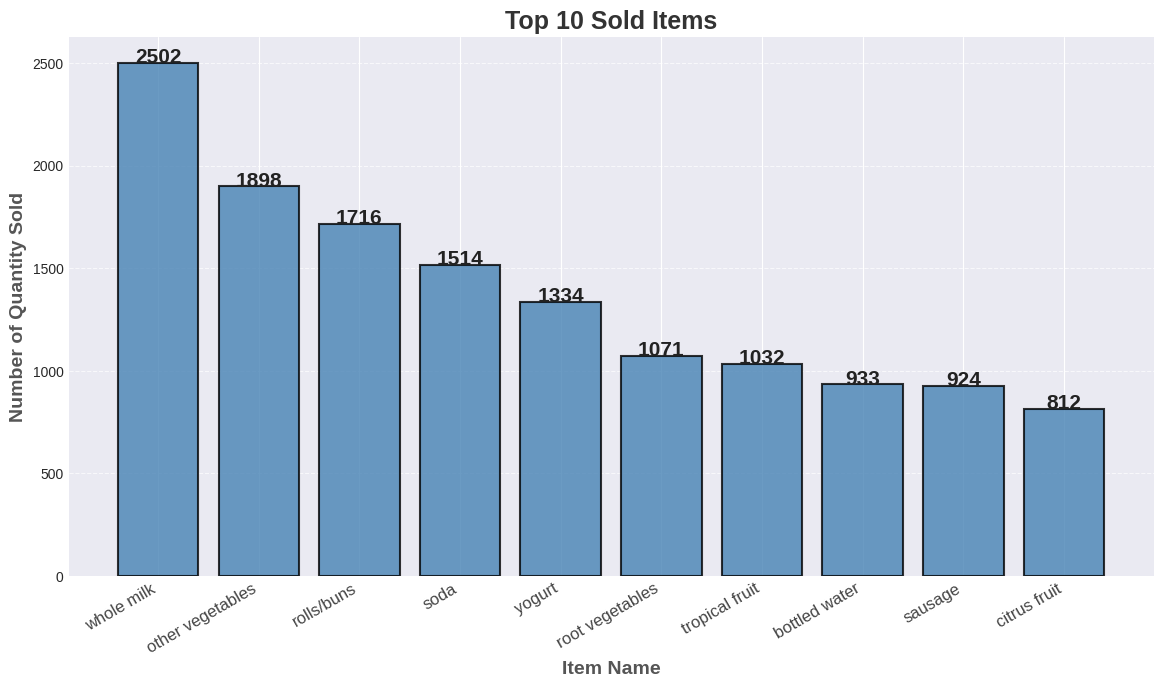

In [132]:


# Creating distribution of Item Sold
Item_distr = df.groupby(by="itemDescription").size().reset_index(name='Frequency')
Item_distr = Item_distr.sort_values(by='Frequency', ascending=False).head(10)

# Declaring variables
bars = Item_distr["itemDescription"]
height = Item_distr["Frequency"]
x_pos = np.arange(len(bars))

# Defining Figure Size and Style
plt.figure(figsize=(14, 7))
plt.style.use('seaborn-darkgrid')

# Create bars with enhanced styling
plt.bar(x_pos, height, color="#4682B4", edgecolor="black", linewidth=1.5, alpha=0.8)

# Add title and axis labels with styling
plt.title("Top 10 Sold Items", fontsize=18, fontweight='bold', color="#333333")
plt.xlabel("Item Name", fontsize=14, fontweight='bold', color="#555555")
plt.ylabel("Number of Quantity Sold", fontsize=14, fontweight='bold', color="#555555")

# Customizing x-axis
plt.xticks(x_pos, bars, rotation=30, ha='right', fontsize=12, color="#444444")

# Adding values on top of bars
for i, v in enumerate(height):
    plt.text(i, v + 2, str(v), ha='center', fontsize=15, fontweight='bold', color="#222222")

# Show grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show graph
plt.show()


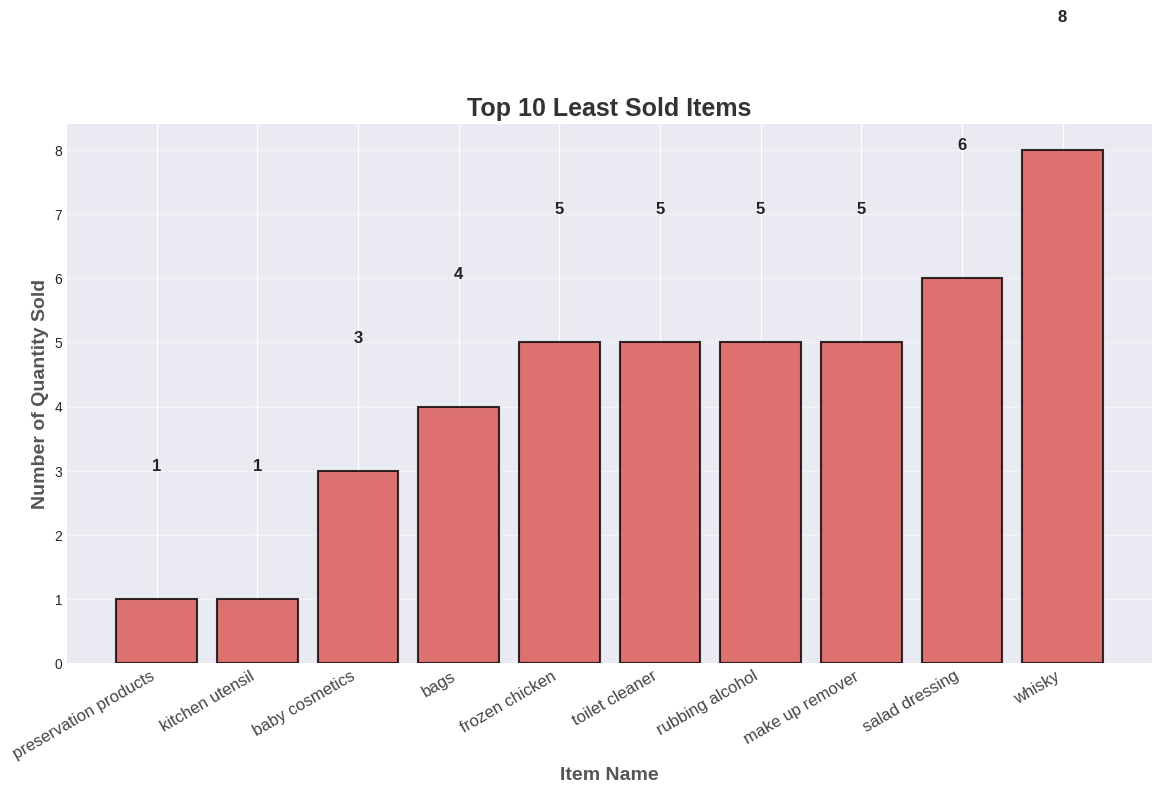

In [133]:
# Creating distribution of least sold items
Item_distr = df.groupby(by="itemDescription").size().reset_index(name='Frequency')
Item_distr = Item_distr.sort_values(by='Frequency', ascending=True).head(10)  # Changed sorting order

# Declaring variables
bars = Item_distr["itemDescription"]
height = Item_distr["Frequency"]
x_pos = np.arange(len(bars))

# Defining Figure Size and Style
plt.figure(figsize=(14, 7))
plt.style.use('seaborn-darkgrid')

# Create bars with enhanced styling
plt.bar(x_pos, height, color="#D9534F", edgecolor="black", linewidth=1.5, alpha=0.8)  # Red color for least sold

# Add title and axis labels with styling
plt.title("Top 10 Least Sold Items", fontsize=18, fontweight='bold', color="#333333")
plt.xlabel("Item Name", fontsize=14, fontweight='bold', color="#555555")
plt.ylabel("Number of Quantity Sold", fontsize=14, fontweight='bold', color="#555555")

# Customizing x-axis
plt.xticks(x_pos, bars, rotation=30, ha='right', fontsize=12, color="#444444")

# Adding values on top of bars
for i, v in enumerate(height):
    plt.text(i, v + 2, str(v), ha='center', fontsize=12, fontweight='bold', color="#222222")

# Show grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show graph
plt.show()

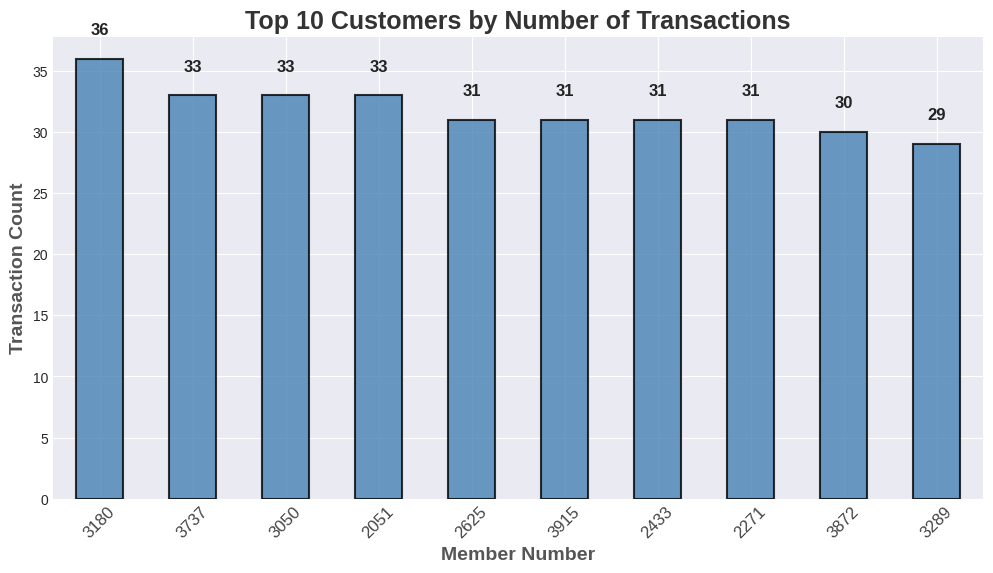

In [134]:
# Identifying the top 10 customers by transaction count
top_customers = df["Member_number"].value_counts().head(10)

# Plotting
plt.figure(figsize=(12, 6))
plt.style.use('seaborn-darkgrid')
top_customers.plot(kind='bar', color="#4682B4", edgecolor="black", linewidth=1.5, alpha=0.8)


plt.title("Top 10 Customers by Number of Transactions", fontsize=18, fontweight='bold', color="#333333")
plt.xlabel("Member Number", fontsize=14, fontweight='bold', color="#555555")
plt.ylabel("Transaction Count", fontsize=14, fontweight='bold', color="#555555")

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12, color="#444444")

# Adding values on top of bars
for i, v in enumerate(top_customers):
    plt.text(i, v + 2, str(v), ha='center', fontsize=12, fontweight='bold', color="#222222")

# Display the plot
plt.show()

<Figure size 1400x700 with 0 Axes>

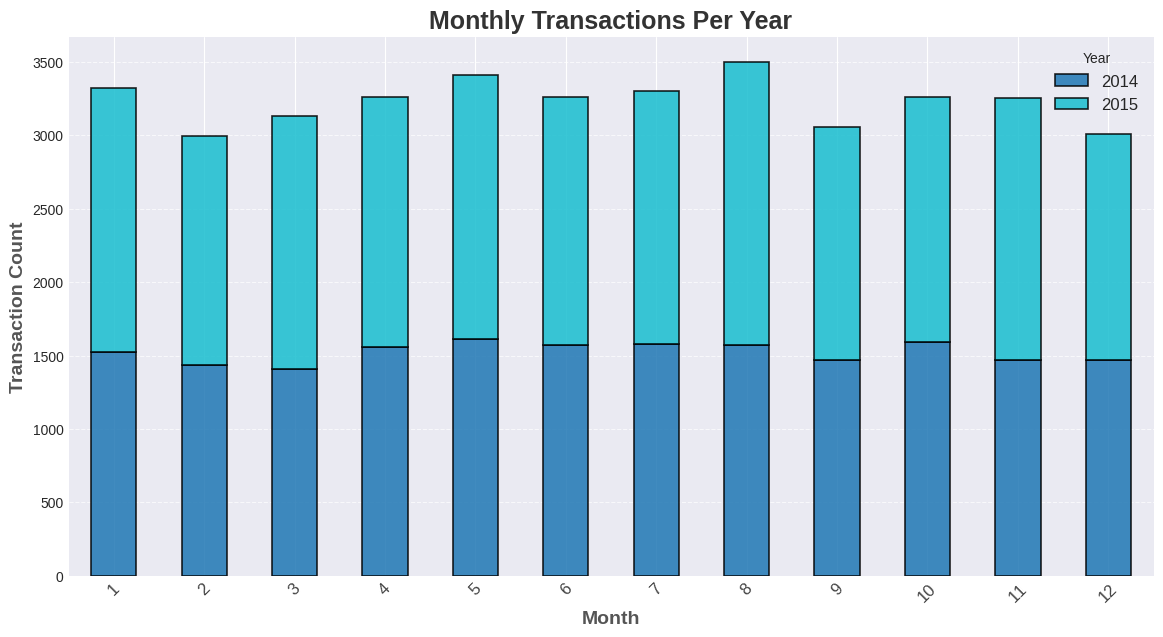

In [135]:
# Convert date column to datetime format (change 'Date' to your actual column name)
df['Date'] = pd.to_datetime(df['Date'])

# Extract Year and Month
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month



# Grouping by year and month
monthly_counts = df.groupby(['year', 'month']).size().unstack()

# Plotting
plt.figure(figsize=(14, 7))
monthly_counts.T.plot(kind='bar', stacked=True, colormap='tab10', figsize=(14,7), edgecolor='black', linewidth=1.2, alpha=0.85)

# Enhancing plot aesthetics
plt.title("Monthly Transactions Per Year", fontsize=18, fontweight='bold', color="#333333")
plt.xlabel("Month", fontsize=14, fontweight='bold', color="#555555")
plt.ylabel("Transaction Count", fontsize=14, fontweight='bold', color="#555555")
plt.xticks(rotation=45, fontsize=12, color="#444444")
plt.legend(title="Year", fontsize=12)

# Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


 # Creating Apriori Algorithm Implementation

In [136]:
df.head(5)

,Member_number,Date,itemDescription,year,month
0,1808,2015-07-21,tropical fruit,2015,7
1,2552,2015-01-05,whole milk,2015,1
2,2300,2015-09-19,pip fruit,2015,9
3,1187,2015-12-12,other vegetables,2015,12
4,3037,2015-02-01,whole milk,2015,2


In [137]:
data = df.copy()
data1 = df.copy()

In [138]:
data = pd.get_dummies(data['itemDescription'])

In [139]:
data.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [140]:
data1.drop(['itemDescription'], axis = 1, inplace = True)

In [141]:
data1 = data1.join(data)

In [142]:
data1.head()

,Member_number,Date,year,month,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,1808,2015-07-21,2015,7,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2552,2015-01-05,2015,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,2300,2015-09-19,2015,9,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1187,2015-12-12,2015,12,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,3037,2015-02-01,2015,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [143]:
products = df['itemDescription'].unique()

In [144]:
products

array(['tropical fruit', 'whole milk', 'pip fruit', 'other vegetables',
       'rolls/buns', 'pot plants', 'citrus fruit', 'beef', 'frankfurter',
       'chicken', 'butter', 'fruit/vegetable juice',
       'packaged fruit/vegetables', 'chocolate', 'specialty bar',
       'butter milk', 'bottled water', 'yogurt', 'sausage', 'brown bread',
       'hamburger meat', 'root vegetables', 'pork', 'pastry',
       'canned beer', 'berries', 'coffee', 'misc. beverages', 'ham',
       'turkey', 'curd cheese', 'red/blush wine',
       'frozen potato products', 'flour', 'sugar', 'frozen meals',
       'herbs', 'soda', 'detergent', 'grapes', 'processed cheese', 'fish',
       'sparkling wine', 'newspapers', 'curd', 'pasta', 'popcorn',
       'finished products', 'beverages', 'bottled beer', 'dessert',
       'dog food', 'specialty chocolate', 'condensed milk', 'cleaner',
       'white wine', 'meat', 'ice cream', 'hard cheese', 'cream cheese ',
       'liquor', 'pickled vegetables', 'liquor (appetizer

In [145]:
data2 = data1.groupby(['Member_number', 'Date'])[products[:]].sum()

In [146]:
data2

tropical fruit  whole milk  pip fruit  \
Member_number Date                                                
1000          2014-06-24               0           1          0   
              2015-03-15               0           1          0   
              2015-05-27               0           0          0   
              2015-07-24               0           0          0   
              2015-11-25               0           0          0   
...                                  ...         ...        ...   
4999          2015-05-16               0           0          0   
              2015-12-26               0           0          0   
5000          2014-03-09               0           0          0   
              2014-11-16               0           0          0   
              2015-02-10               0           0          0   

                          other vegetables  rolls/buns  pot plants  \
Member_number Date                                                   
1000          2014-06-24                 0           0           0   
              2015-03-15                 0           0           0   
              2015-05-27                 0           0           0   
              2015-07-24                 0           0           0   
              2015-11-25                 0           0           0   
...                                    ...         ...         ...   
4999          2015-05-16                 0           0           0   
              2015-12-26                 0           0           0   
5000          2014-03-09                 0           0           0   
              2014-11-16                 1           0           0   
              2015-02-10                 0           0           0   

                          citrus fruit  beef  frankfurter  chicken  ...  \
Member_number Date                                                  ...   
1000          2014-06-24             0     0            0        0  ...   
              2015-03-15             0     0            0        0  ...   
              2015-05-27             0     0            0        0  ...   
              2015-07-24             0     0            0        0  ...   
              2015-11-25             0     0            0        0  ...   
...                                ...   ...          ...      ...  ...   
4999          2015-05-16             0     0            0        0  ...   
              2015-12-26             0     0            0        0  ...   
5000          2014-03-09             0     0            0        0  ...   
              2014-11-16             0     0            0        0  ...   
              2015-02-10             0     0            0        0  ...   

                          flower (seeds)  rice  tea  salad dressing  \
Member_number Date                                                    
1000          2014-06-24               0     0    0               0   
              2015-03-15               0     0    0               0   
              2015-05-27               0     0    0               0   
              2015-07-24               0     0    0               0   
              2015-11-25               0     0    0               0   
...                                  ...   ...  ...             ...   
4999          2015-05-16               0     0    0               0   
              2015-12-26               0     0    0               0   
5000          2014-03-09               0     0    0               0   
              2014-11-16               0     0    0               0   
              2015-02-10               0     0    0               0   

                          specialty vegetables  pudding powder  ready soups  \
Member_number Date                                                            
1000          2014-06-24                     0               0            0   
              2015-03-15                     0               0            0   
              2015-05-27   

In [147]:
data2.head()

tropical fruit  whole milk  pip fruit  \
Member_number Date                                                
1000          2014-06-24               0           1          0   
              2015-03-15               0           1          0   
              2015-05-27               0           0          0   
              2015-07-24               0           0          0   
              2015-11-25               0           0          0   

                          other vegetables  rolls/buns  pot plants  \
Member_number Date                                                   
1000          2014-06-24                 0           0           0   
              2015-03-15                 0           0           0   
              2015-05-27                 0           0           0   
              2015-07-24                 0           0           0   
              2015-11-25                 0           0           0   

                          citrus fruit  beef  frankfurter  chicken  ...  \
Member_number Date                                                  ...   
1000          2014-06-24             0     0            0        0  ...   
              2015-03-15             0     0            0        0  ...   
              2015-05-27             0     0            0        0  ...   
              2015-07-24             0     0            0        0  ...   
              2015-11-25             0     0            0        0  ...   

                          flower (seeds)  rice  tea  salad dressing  \
Member_number Date                                                    
1000          2014-06-24               0     0    0               0   
              2015-03-15               0     0    0               0   
              2015-05-27               0     0    0               0   
              2015-07-24               0     0    0               0   
              2015-11-25               0     0    0               0   

                          specialty vegetables  pudding powder  ready soups  \
Member_number Date                                                            
1000          2014-06-24                     0               0            0   
              2015-03-15                     0               0            0   
              2015-05-27                     0               0            0   
              2015-07-24                     0               0            0   
              2015-11-25                     0               0            0   

                          make up remover  toilet cleaner  \
Member_number Date                                          
1000          2014-06-24                0               0   
              2015-03-15                0               0   
              2015-05-27                0               0   
              2015-07-24                0               0   
              2015-11-25                0               0   

                          preservation products  
Member_number Date                               
1000          2014-06-24                      0  
              2015-03-15                      0  
              2015-05-27                      0  
              2015-07-24                      0  
              2015-11-25                      0  

[5 rows x 167 columns]

In [148]:
data2 = data2.reset_index()[products]

In [149]:
data2.head()

,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,pot plants,citrus fruit,beef,frankfurter,chicken,...,flower (seeds),rice,tea,salad dressing,specialty vegetables,pudding powder,ready soups,make up remover,toilet cleaner,preservation products
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [150]:
data2.values

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [151]:
data2['tropical fruit']

0        0
1        0
2        0
3        0
4        0
        ..
14958    0
14959    0
14960    0
14961    0
14962    0
Name: tropical fruit, Length: 14963, dtype: int64

In [152]:
def funct(data):
  for i in products:
    if data[i] > 0:
      data[i] = i

  return data 

In [153]:
data2 = data2.apply(funct, axis = 1)

In [154]:
data2.head()

,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,pot plants,citrus fruit,beef,frankfurter,chicken,...,flower (seeds),rice,tea,salad dressing,specialty vegetables,pudding powder,ready soups,make up remover,toilet cleaner,preservation products
0,0,whole milk,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,whole milk,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [156]:
newdata = data2.values

In [157]:
newdata

array([[0, 'whole milk', 0, ..., 0, 0, 0],
       [0, 'whole milk', 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=object)

In [158]:
newdata.ndim

2

In [159]:
newdata = [i[i!=0].tolist() for i in newdata if i[i!=0].tolist()]

In [160]:
newdata[:10]

[['whole milk', 'pastry', 'salty snack'],
 ['whole milk', 'yogurt', 'sausage', 'semi-finished bread'],
 ['soda', 'pickled vegetables'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['whole milk', 'rolls/buns', 'sausage'],
 ['whole milk', 'soda'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['beef', 'white bread'],
 ['frankfurter', 'curd']]

 # Apriori

In [161]:
association = apriori(newdata, min_support = 0.0003, min_confidence = 0.05, max_length = 3, min_lift = 3)


In [162]:
result = list(association)

In [163]:
result

[RelationRecord(items=frozenset({'liver loaf', 'fruit/vegetable juice'}), support=0.00040098910646260775, ordered_statistics=[OrderedStatistic(items_base=frozenset({'liver loaf'}), items_add=frozenset({'fruit/vegetable juice'}), confidence=0.12, lift=3.5276227897838903)]),
 RelationRecord(items=frozenset({'pickled vegetables', 'ham'}), support=0.0005346521419501437, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pickled vegetables'}), items_add=frozenset({'ham'}), confidence=0.05970149253731344, lift=3.4895055970149254)]),
 RelationRecord(items=frozenset({'meat', 'roll products '}), support=0.0003341575887188398, ordered_statistics=[OrderedStatistic(items_base=frozenset({'roll products '}), items_add=frozenset({'meat'}), confidence=0.06097560975609757, lift=3.620547812620984)]),
 RelationRecord(items=frozenset({'misc. beverages', 'salt'}), support=0.0003341575887188398, ordered_statistics=[OrderedStatistic(items_base=frozenset({'salt'}), items_add=frozenset({'misc. beverag

In [164]:
result[1]

RelationRecord(items=frozenset({'pickled vegetables', 'ham'}), support=0.0005346521419501437, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pickled vegetables'}), items_add=frozenset({'ham'}), confidence=0.05970149253731344, lift=3.4895055970149254)])

In [165]:
type(result[1])

apyori.RelationRecord